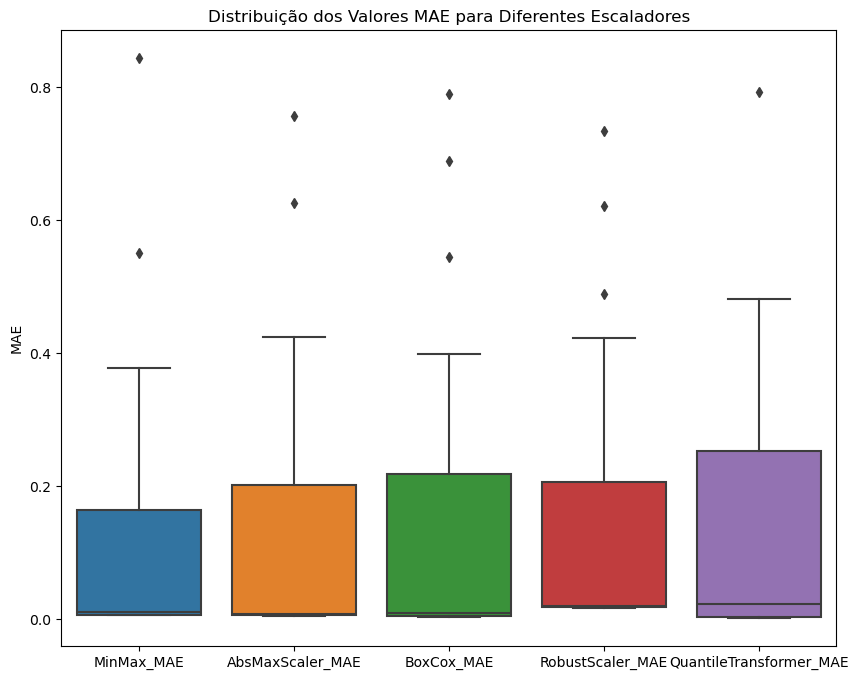

            Lista A                  Lista B   p-value  \
0        MinMax_MAE         AbsMaxScaler_MAE  0.640825   
1        MinMax_MAE               BoxCox_MAE  0.439967   
2        MinMax_MAE         RobustScaler_MAE  0.015460   
3        MinMax_MAE  QuantileTransformer_MAE  0.839393   
4  AbsMaxScaler_MAE               BoxCox_MAE  0.370741   
5  AbsMaxScaler_MAE         RobustScaler_MAE  0.001864   
6  AbsMaxScaler_MAE  QuantileTransformer_MAE  0.855272   
7        BoxCox_MAE         RobustScaler_MAE  0.047259   
8        BoxCox_MAE  QuantileTransformer_MAE  0.903226   
9  RobustScaler_MAE  QuantileTransformer_MAE  0.349211   

               Menor Lista  
0               MinMax_MAE  
1               MinMax_MAE  
2               MinMax_MAE  
3               MinMax_MAE  
4         AbsMaxScaler_MAE  
5         AbsMaxScaler_MAE  
6         AbsMaxScaler_MAE  
7               BoxCox_MAE  
8  QuantileTransformer_MAE  
9  QuantileTransformer_MAE  


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Listas fornecidas
MinMax_MAE = [
    0.84365487, 0.00642096, 0.00549750, 0.00884642, 0.55065948, 0.00554991,
    0.00984573, 0.15464671, 0.23449613, 0.22820039, 0.00557351, 0.00912782,
    0.00759446, 0.02278697, 0.00572473, 0.00959903, 0.04385952, 0.00679980,
    0.00592277, 0.16667593, 0.02053367, 0.00527777, 0.10644511, 0.00917930,
    0.00801335, 0.37795994, 0.00580818, 0.01587125, 0.23571439, 0.30609858
]

AbsMaxScaler_MAE = [
    0.75703841, 0.00589186, 0.00792307, 0.00745368, 0.62592739, 0.00532416,
    0.00660523, 0.18519641, 0.20741972, 0.11133524, 0.00553703, 0.39335918,
    0.00546144, 0.00554558, 0.00569497, 0.05896554, 0.00497928, 0.00537468,
    0.00613061, 0.15493175, 0.23920602, 0.00529019, 0.02118786, 0.00556365,
    0.00660090, 0.42410883, 0.00585041, 0.41931394, 0.24287392, 0.15663067
]

BoxCox_MAE = [
    0.78972781, 0.00386626, 0.00572718, 0.00571583, 0.68943834,
    0.00544001, 0.00556139, 0.19901682, 0.25700793, 0.18567713,
    0.00391236, 0.38911280, 0.00457772, 0.00326767, 0.00349306,
    0.04888562, 0.01080074, 0.00421932, 0.00326001, 0.12837914,
    0.23443878, 0.00489287, 0.01589382, 0.00565716, 0.00693018,
    0.39922109, 0.00421609, 0.54469931, 0.22405922, 0.15456431
]

RobustScaler_MAE = [
    0.73411411, 0.01941808, 0.01805075, 0.02002380, 0.62062317,
    0.01832691, 0.01793848, 0.16187701, 0.26922166, 0.20703627,
    0.01782154, 0.20227571, 0.01735926, 0.01836318, 0.01835401,
    0.08272226, 0.01648342, 0.01721630, 0.01917167, 0.19931932,
    0.24496162, 0.01707506, 0.01895296, 0.01666380, 0.01799508,
    0.42218691, 0.01886794, 0.48882762, 0.24464257, 0.17146586
]

QuantileTransformer_MAE = [
    0.48189586, 0.00199886, 0.00166657, 0.00760918, 0.79198134,
    0.00172793, 0.00796540, 0.16615629, 0.27776885, 0.12538262,
    0.00384027, 0.30959487, 0.00541099, 0.00105953, 0.00172233,
    0.06099727, 0.00536875, 0.00150677, 0.00574481, 0.11915680,
    0.26465228, 0.00202524, 0.03654779, 0.03840229, 0.00681597,
    0.44016275, 0.00251191, 0.42184058, 0.29096872, 0.21573046
]

# Listas para comparar
listas = [MinMax_MAE, AbsMaxScaler_MAE, BoxCox_MAE, RobustScaler_MAE, QuantileTransformer_MAE]
nomes_listas = ['MinMax_MAE', 'AbsMaxScaler_MAE', 'BoxCox_MAE', 'RobustScaler_MAE', 'QuantileTransformer_MAE']

# Função para comparar todas as listas
def comparar_listas(listas, nomes):
    resultados = []
    for i in range(len(listas)):
        for j in range(i+1, len(listas)):
            stat, p = stats.wilcoxon(listas[i], listas[j])
            menor_lista = nomes[i] if np.mean(listas[i]) < np.mean(listas[j]) else nomes[j]
            resultados.append([nomes[i], nomes[j], p, menor_lista])
    return pd.DataFrame(resultados, columns=['Lista A', 'Lista B', 'p-value', 'Menor Lista'])

# Comparar listas
df_resultados = comparar_listas(listas, nomes_listas)

# Plotar os resultados
plt.figure(figsize=(10, 8))
sns.boxplot(data=listas)
plt.xticks(ticks=np.arange(len(nomes_listas)), labels=nomes_listas)
plt.title('Distribuição dos Valores MAE para Diferentes Escaladores')
plt.ylabel('MAE')
plt.show()

# Mostrar a tabela de resultados
print(df_resultados)


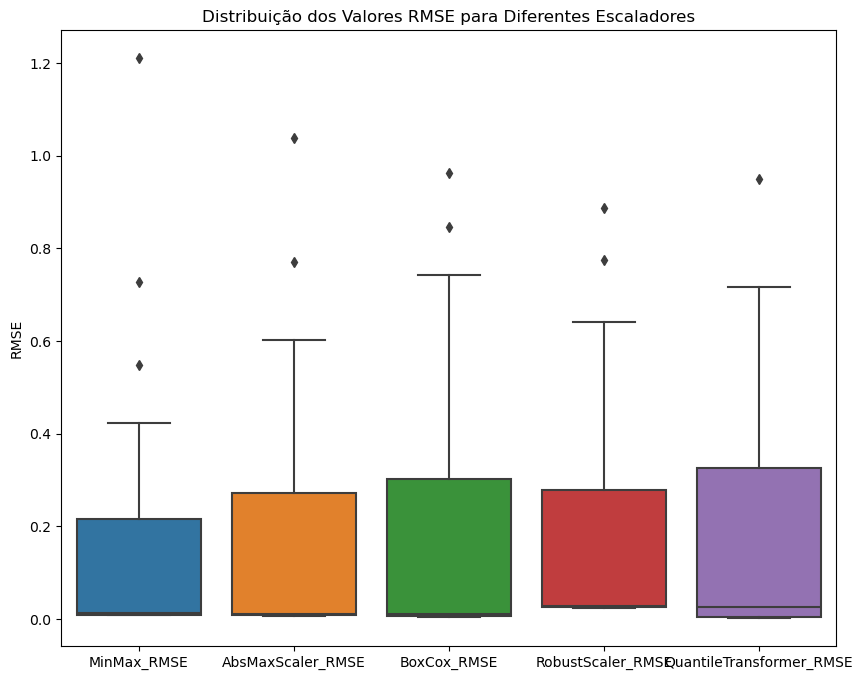

             Lista A                   Lista B   p-value  \
0        MinMax_RMSE         AbsMaxScaler_RMSE  0.655438   
1        MinMax_RMSE               BoxCox_RMSE  0.393050   
2        MinMax_RMSE         RobustScaler_RMSE  0.017454   
3        MinMax_RMSE  QuantileTransformer_RMSE  0.807830   
4  AbsMaxScaler_RMSE               BoxCox_RMSE  0.183969   
5  AbsMaxScaler_RMSE         RobustScaler_RMSE  0.002560   
6  AbsMaxScaler_RMSE  QuantileTransformer_RMSE  0.583757   
7        BoxCox_RMSE         RobustScaler_RMSE  0.066665   
8        BoxCox_RMSE  QuantileTransformer_RMSE  0.670181   
9  RobustScaler_RMSE  QuantileTransformer_RMSE  0.114177   

                Menor Lista  
0               MinMax_RMSE  
1               MinMax_RMSE  
2               MinMax_RMSE  
3               MinMax_RMSE  
4         AbsMaxScaler_RMSE  
5         AbsMaxScaler_RMSE  
6  QuantileTransformer_RMSE  
7         RobustScaler_RMSE  
8  QuantileTransformer_RMSE  
9  QuantileTransformer_RMSE  


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Listas fornecidas
MinMax_RMSE = [
    1.21023631, 0.00898360, 0.00784958, 0.01167450, 0.72778165, 0.00788519,
    0.01210854, 0.21707396, 0.29912817, 0.26360753, 0.00784157, 0.01186286,
    0.01009387, 0.03155293, 0.00815137, 0.01280351, 0.05157349, 0.00893293,
    0.00839489, 0.21110141, 0.02679117, 0.00758969, 0.16012919, 0.01165511,
    0.01105910, 0.54914713, 0.00818899, 0.01875834, 0.32562914, 0.42356271
]

AbsMaxScaler_RMSE = [
    1.03690803, 0.00837954, 0.00966002, 0.00993339, 0.77061403,
    0.00737440, 0.00909426, 0.24792778, 0.27926278, 0.16914429,
    0.00771557, 0.51156777, 0.00772880, 0.00788398, 0.00799241,
    0.08168124, 0.00719304, 0.00765924, 0.00858106, 0.21138528,
    0.33818340, 0.00753740, 0.02604160, 0.00786107, 0.00883037,
    0.60248762, 0.00822686, 0.57138240, 0.33221766, 0.18732481
]

BoxCox_RMSE = [
    0.96161795, 0.00512047, 0.00678258, 0.00807150, 0.84493703,
    0.00666835, 0.00733972, 0.28059074, 0.32360402, 0.25197390,
    0.00550750, 0.50809932, 0.00607817, 0.00470550, 0.00495856,
    0.07053225, 0.01218418, 0.00565008, 0.00464289, 0.18008736,
    0.33022723, 0.00605872, 0.02016067, 0.00689008, 0.00981369,
    0.56558675, 0.00552516, 0.74248457, 0.30859607, 0.18956590
]

RobustScaler_RMSE = [
    0.88666940, 0.02764543, 0.02573996, 0.02821406, 0.77493346,
    0.02560955, 0.02563829, 0.22670424, 0.34281829, 0.23661345,
    0.02527967, 0.28892177, 0.02509093, 0.02608997, 0.02610675,
    0.10220373, 0.02385237, 0.02476585, 0.02730006, 0.24641268,
    0.33315349, 0.02453486, 0.02696796, 0.02371932, 0.02567223,
    0.59841865, 0.02689562, 0.64157069, 0.33267301, 0.22279152
]

QuantileTransformer_RMSE = [
    0.71688163, 0.00302901, 0.00217023, 0.00936609, 0.94940090,
    0.00257500, 0.00930570, 0.23229334, 0.34760678, 0.18118292,
    0.00493682, 0.41898242, 0.00609806, 0.00187999, 0.00231652,
    0.08449855, 0.00642830, 0.00206687, 0.00644059, 0.16713893,
    0.36784360, 0.00260679, 0.04381344, 0.04836451, 0.00906198,
    0.57338893, 0.00364023, 0.57188678, 0.38314629, 0.25916404
]

# Listas para comparar
listas_rmse = [MinMax_RMSE, AbsMaxScaler_RMSE, BoxCox_RMSE, RobustScaler_RMSE, QuantileTransformer_RMSE]
nomes_listas_rmse = ['MinMax_RMSE', 'AbsMaxScaler_RMSE', 'BoxCox_RMSE', 'RobustScaler_RMSE', 'QuantileTransformer_RMSE']

# Função para comparar todas as listas
def comparar_listas(listas, nomes):
    resultados = []
    for i in range(len(listas)):
        for j in range(i+1, len(listas)):
            stat, p = stats.wilcoxon(listas[i], listas[j])
            menor_lista = nomes[i] if np.mean(listas[i]) < np.mean(listas[j]) else nomes[j]
            resultados.append([nomes[i], nomes[j], p, menor_lista])
    return pd.DataFrame(resultados, columns=['Lista A', 'Lista B', 'p-value', 'Menor Lista'])

# Comparar listas
df_resultados_rmse = comparar_listas(listas_rmse, nomes_listas_rmse)

# Plotar os resultados
plt.figure(figsize=(10, 8))
sns.boxplot(data=listas_rmse)
plt.xticks(ticks=np.arange(len(nomes_listas_rmse)), labels=nomes_listas_rmse)
plt.title('Distribuição dos Valores RMSE para Diferentes Escaladores')
plt.ylabel('RMSE')
plt.show()

# Mostrar a tabela de resultados
print(df_resultados_rmse)
